#Introduction

Stock market sentiment analysis is an evolving technique which can be effectively used to compliment fundamental, quantitative and technical analysis.

Market sentiment is a qualitative measure of the attitude and mood of investors to financial markets in general, and specific sectors or assets in particular. Positive and negative sentiment drive price action, and also create trading and investment opportunities for active traders and long-term investors.

## About the Dataset

Description
Tweets were collectect between April 9 and July 16, 2020 using not only the SPX500 tag but also the top 25 companies in the index and "#stocks". 1300 tweets were manually classified and reviewed.
The proposed specialised dictionary is also present in the data of this contribution. All the source code used to download tweets, check the top words and evaluate the sentiment are present.

Content
- ID -> Contains id used for the tweet.
- Date and time -> Date and time when the tweet was tweeted.
- Tweet -> Tweet/text written by the user.
- Sentiment -> Wheter the tweet was postive or negative.


Acknowledgements
Cite - Bruno Taborda, Ana de Almeida, José Carlos Dias, Fernando Batista, Ricardo Ribeiro, April 15, 2021, "Stock Market Tweets Data", IEEE Dataport, doi: https://dx.doi.org/10.21227/g8vy-5w61.

**I do not own this dataset, thanks to the authors for creating this dataset. Please cite if using the dataset.**


### Official ABSTRACT

Twitter is one of the most popular social networks for sentiment analysis. This data set of tweets are related to the stock market. We collected 943,672 tweets between April 9 and July 16, 2020, using the S&P 500 tag (#SPX500), the references to the top 25 companies in the S&P 500 index, and the Bloomberg tag (#stocks). 1,300 out of the 943,672 tweets were manually annotated in positive, neutral, or negative classes. A second independent annotator reviewed the manually annotated tweets. This annotated data set can contribute to create new domain-specific lexicons or enrich some of the actual dictionaries. Researchers can train their supervised models using the annotated data set. Additionally, the full data set can be used for text mining and sentiment analysis related to the stock market.

Instructions: 
Twitter RAW data was downloaded using the Twitter REST API search, namely the "Tweepy (version 3.8.0)" Python package, which was created to make the interaction between the REST API and the developers easier. The Twitter REST API only retrieves data from the past seven days and allows to filter tweets by language. The tweets retrieved were filtered out for the English (en) language. Data collection was performed from April 9 to July 16, 2020, using the following Twitter tags as search parameter: #SPX500, #SP500, SPX500, SP500, $SPX, #stocks, $MSFT, $AAPL, $AMZN, $FB, $BBRK.B, $GOOG, $JNJ, $JPM, $V, $PG, $MA, $INTC $UNH, $BAC, $T, $HD, $XOM, $DIS, $VZ, $KO, $MRK, $CMCSA, $CVX, $PEP, $PFE. Due to the large number of data retrieved in the RAW files, it was necessary to store only each tweet's content and creation date.

 

The file tweets_labelled_09042020_16072020.csv consists of 5,000 tweets selected using random sampling out of the 943,672 sampled. Out of those 5,000 tweets, 1,300 were manually annotated and reviewed by a second independent annotator. The file tweets_remaining_09042020_16072020.csv contains the remaining 938,672 tweets.

## Estimating the sentiment of each tweet

It would be interesting to investigate whether stock sentiment can be quantified using tweets related to a company.

I will use NLTK's built-in, pretrained sentiment analyzer called VADER (Valence Aware Dictionary and Sentiment Reasoner).

VADER relies on a dictionary that maps words and other numerous lexical features common to sentiment expression in microblogs.

These features include:

- A full list of Western-style emoticons ( for example - :D and :P )

- Sentiment-related acronyms ( for example - LOL and ROFL )
- Commonly used slang with sentiment value ( for example - Nah and meh )
- Manually creating a thorough sentiment dictionary is a labour-intensive and sometimes error-prone process. Thus it is no wonder that many NLP researchers rely so heavily on existing dictionaries as primary resources.

The below code returns the 'compound' score for each tweet,this score ranges from -1 (most negative) to +1 ( most positive).

To create a categorical variable we can try apply the following heuristic:

Neg = compound score < -0.6 Pos = compound score > +1.4 Neutral = -0.6 < compound score < +1.4 Having tested VADER against a selection of hypothetical tweets, it appeared that the standard vocabulary wasn't sufficent for this task (see the below examples), but we can augment this vocabulary used by the sentiment analyser with some terminology related to stock market sentiment

e.g. "Buy","Hold","Bull","Bear","Bubble"

## Installing Dependencies

In [1]:
!pip install yahoo_fin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 81 kB 3.9 MB/s 
     |████████████████████████████████| 83 kB 1.7 MB/s 
     |████████████████████████████████| 112 kB 50.3 MB/s 
     |████████████████████████████████| 127 kB 59.2 MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=dfb577e5371f78512ffdc7a5004151c0fb679216d1cfebe6e874eeac1ec64866
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=9dc4d63c219dc35117fee3e0515b8fc06bf8a15b73e4e86ad2b34b5595c95e2b
  Stored in directory: /root/.cache/pip/wheels/9c/aa/cc/f2228050ccb40f22144b073f15a2c84f11204f29fc0dce028e
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6066 sha256=618768ff4befa8bb66841cc3e4481fa789f1f1d1bb5f4c477d057

## Importing essential libraries

In [2]:
# imports
import datetime
import csv
import os
import sys
import timeit
import platform 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import json
import collections
from yahoo_fin.stock_info import get_data
import warnings

In [3]:
warnings.filterwarnings(action="ignore")

In [4]:
# machine learning imports
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [5]:
# deep learning imports
import tensorflow as tf
from tensorflow.keras.models import save_model, Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import Dense, Bidirectional
from tensorflow.keras.layers import LSTM, Conv1D, Dropout, Flatten, MaxPooling1D, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical


In [6]:
# Natural Language Processing imports
import nltk
nltk.download('vader_lexicon')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

!pip install --upgrade vaderSentiment
#from nltk.sentiment.vader import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import unicodedata

sentiment_i_a = SentimentIntensityAnalyzer()
positive_words='buy bull long support undervalued underpriced cheap upward rising trend moon rocket hold breakout call beat support buying holding high profit'
negative_words='sell bear bubble bearish short overvalued overbought overpriced expensive downward falling sold sell low put miss resistance squeeze cover seller '

dictOfpos = { i : 4 for i in positive_words.split(" ") }
dictOfneg = { i : -4 for i in negative_words.split(" ")  }
Financial_Lexicon = {**dictOfpos, **dictOfneg}

sentiment_i_a.lexicon.update(Financial_Lexicon)

from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 6.8 MB/s 


## Get the data files

In [7]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive.zip


In [8]:
!unzip /content/archive.zip

Archive:  /content/archive.zip
  inflating: tweets_labelled_09042020_16072020.csv  
  inflating: tweets_remaining_09042020_16072020.csv  


## Read the files to tabular data

In [9]:
labelled_tweets = pd.read_csv("/content/tweets_labelled_09042020_16072020.csv", sep=';', lineterminator='\n', on_bad_lines='skip')
labelled_tweets.columns = ["id",	"created_at", "text", "sentiment"]

In [10]:
unlabelled_tweets = pd.read_csv("/content/tweets_remaining_09042020_16072020.csv", sep=';', lineterminator='\n', on_bad_lines='skip')
unlabelled_tweets.columns = ["id",	"created_at", "text"]
unlabelled_tweets["sentiment"] = ""

### Check the data

In [11]:
labelled_tweets.head()

,id,created_at,text,sentiment
0,77522,2020-04-15 01:03:46+00:00,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...",positive\r
1,661634,2020-06-25 06:20:06+00:00,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,negative\r
2,413231,2020-06-04 15:41:45+00:00,Net issuance increases to fund fiscal programs...,positive\r
3,760262,2020-07-03 19:39:35+00:00,RT @bentboolean: How much of Amazon's traffic ...,positive\r
4,830153,2020-07-09 14:39:14+00:00,$AMD Ryzen 4000 desktop CPUs looking ‘great’ a...,positive\r


In [12]:
unlabelled_tweets.head()

,id,created_at,text,sentiment
0,1,2020-04-09 23:59:51+00:00,@KennyDegu very very little volume. With $10T ...,
1,2,2020-04-09 23:58:55+00:00,#ES_F achieved Target 2780 closing above 50% #...,
2,3,2020-04-09 23:58:52+00:00,RT @KimbleCharting: Silver/Gold indicator crea...,
3,4,2020-04-09 23:58:27+00:00,@Issaquahfunds Hedged our $MSFT position into ...,
4,5,2020-04-09 23:57:59+00:00,RT @zipillinois: 3 Surprisingly Controversial ...,


## Join all data and sort by the time of creation

In [13]:
all_tweets = pd.concat([labelled_tweets, unlabelled_tweets], axis=0, join="inner", ignore_index=True)
all_tweets = all_tweets.sort_values(by=["created_at"])

In [14]:
all_tweets

,id,created_at,text,sentiment
18940,14136,2020-04-09 00:00:01+00:00,S&amp;P 500 | $SPX | $SPX500 $USD\n\nS&amp;P T...,
236,14135,2020-04-09 00:00:03+00:00,"$HEXO target price is $2.21, HEXO has a upside...",positive\r
18939,14134,2020-04-09 00:00:15+00:00,Why #realestate beats #stocks during a #recess...,
18938,14133,2020-04-09 00:00:15+00:00,RT @DisneyTVANews: It's been confirmed that @D...,
18937,14132,2020-04-09 00:00:26+00:00,This private #stocks #swingtrading https://t.c...,
...,...,...,...,...
914550,924309,2020-07-16 23:58:57+00:00,Quality company proving during hard times #JNJ...,
914549,924308,2020-07-16 23:58:59+00:00,RT @ABiggzHD: Small Account: NA\nBig Account: ...,
914548,924307,2020-07-16 23:59:03+00:00,"If $AMZN dropped below $2,000 I would LOVE to ...",
914547,924306,2020-07-16 23:59:12+00:00,$MS $BAC https://t.co/o7Vm9UFCC9\r,


## Cleaning the tweets

In [15]:
all_tweets["sentiment"].value_counts()

              923673
\r              3700
positive\r       528
neutral\r        424
negative\r       348
Name: sentiment, dtype: int64

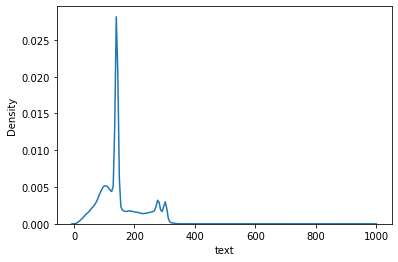

In [16]:
# plot length of the tweets
lenght = all_tweets["text"].str.len()
sns.kdeplot(lenght)
plt.show()

In [17]:
whitespace = re.compile(r"\s+")
web_address = re.compile(r"(?i)http(s):\/\/[a-z0-9.~_\-\/]+")

user = re.compile(r"(?i)@[a-z0-9_]+")

# we then use the sub method to replace anything matching
all_tweets['text'] = all_tweets['text'].map(lambda x: whitespace.sub(' ', x))
all_tweets['text'] = all_tweets['text'].map(lambda x: web_address.sub('', x))
all_tweets['text'] = all_tweets['text'].map(lambda x: user.sub('', x))

all_tweets.columns = all_tweets.columns.str.replace('\r', '')
all_tweets['sentiment'] = all_tweets['sentiment'].str.replace('\r', '')

In [18]:
all_tweets.head()

,id,created_at,text,sentiment
18940,14136,2020-04-09 00:00:01+00:00,S&amp;P 500 | $SPX | $SPX500 $USD S&amp;P TARG...,
236,14135,2020-04-09 00:00:03+00:00,"$HEXO target price is $2.21, HEXO has a upside...",positive
18939,14134,2020-04-09 00:00:15+00:00,Why #realestate beats #stocks during a #recess...,
18938,14133,2020-04-09 00:00:15+00:00,RT : It's been confirmed that will arrive to ...,
18937,14132,2020-04-09 00:00:26+00:00,This private #stocks #swingtrading will help ...,


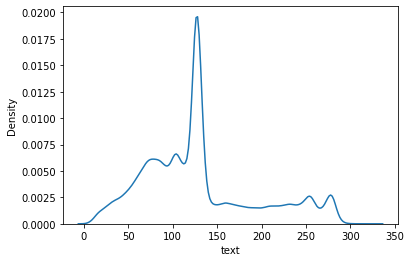

In [19]:
# plot length of the tweets after cleaning
lenght = all_tweets["text"].str.len()
sns.kdeplot(lenght)
plt.show()

In [20]:
all_tweets["sentiment"].value_counts()

            927373
positive       528
neutral        424
negative       348
Name: sentiment, dtype: int64

In [21]:
all_tweets["text"] = all_tweets["text"].map(lambda x: str(x)) 

In [22]:
all_tweets.dtypes

id             int64
created_at    object
text          object
sentiment     object
dtype: object

In [23]:
all_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 928673 entries, 18940 to 914546
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          928673 non-null  int64 
 1   created_at  928673 non-null  object
 2   text        928673 non-null  object
 3   sentiment   928673 non-null  object
dtypes: int64(1), object(3)
memory usage: 67.7+ MB


## Score the sentiment for all tweets

In [24]:
for indexx, row in all_tweets.T.iteritems():
  
  try:
          sentence_i = unicodedata.normalize('NFKD', all_tweets.loc[indexx, 'text'])
          sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
          all_tweets.at[indexx, 'Comp_vader'] =  sentence_sentiment['compound']
          all_tweets.at[indexx, 'Negative_vader'] = sentence_sentiment['neg']
          all_tweets.at[indexx, 'Neutral_vader'] =  sentence_sentiment['neu']
          all_tweets.at[indexx, 'Positive_vader'] = sentence_sentiment['pos'] 
  except TypeError as e:
          print(all_tweets.loc[indexx, 'text'])
          print('failed on_status,',str(e))

In [25]:
all_tweets = all_tweets.drop(["sentiment"], axis=1)

In [26]:
all_tweets["Comp_vader"].describe()

count    928673.000000
mean          0.166139
std           0.465130
min          -0.999100
25%           0.000000
50%           0.000000
75%           0.557400
max           0.999500
Name: Comp_vader, dtype: float64

In [27]:
all_tweets

,id,created_at,text,Comp_vader,Negative_vader,Neutral_vader,Positive_vader
18940,14136,2020-04-09 00:00:01+00:00,S&amp;P 500 | $SPX | $SPX500 $USD S&amp;P TARG...,0.0000,0.179,0.643,0.179
236,14135,2020-04-09 00:00:03+00:00,"$HEXO target price is $2.21, HEXO has a upside...",0.0000,0.000,1.000,0.000
18939,14134,2020-04-09 00:00:15+00:00,Why #realestate beats #stocks during a #recess...,-0.4215,0.237,0.763,0.000
18938,14133,2020-04-09 00:00:15+00:00,RT : It's been confirmed that will arrive to ...,0.0000,0.000,1.000,0.000
18937,14132,2020-04-09 00:00:26+00:00,This private #stocks #swingtrading will help ...,0.4376,0.211,0.494,0.295
...,...,...,...,...,...,...,...
914550,924309,2020-07-16 23:58:57+00:00,Quality company proving during hard times #JNJ...,-0.1027,0.135,0.865,0.000
914549,924308,2020-07-16 23:58:59+00:00,"RT : Small Account: NA Big Account: up $1,347 ...",-0.2003,0.110,0.809,0.081
914548,924307,2020-07-16 23:59:03+00:00,"If $AMZN dropped below $2,000 I would LOVE to ...",0.7841,0.000,0.844,0.156
914547,924306,2020-07-16 23:59:12+00:00,$MS $BAC,0.0000,0.000,1.000,0.000


In [28]:
def sentiment_plot(stock_tweets):
  posi=0
  nega=0
  neutral = 0
  for i in range (0,len(stock_tweets)):
    get_val = stock_tweets.Comp_vader[i]
    if(float(get_val)<(0)):
        nega=nega+1
    if(float(get_val>(0))):
        posi=posi+1
    if(float(get_val)==(0)):
        neutral=neutral+1
  
  posper=(posi/(len(stock_tweets)))*100
  negper=(nega/(len(stock_tweets)))*100
  neutralper=(neutral/(len(stock_tweets)))*100

  arr=np.asarray([posper,negper,neutralper], dtype=int)
  plt.figure()
  plt.pie(arr,labels=['positive','negative', 'neutral'])
  plt.plot()

  print("% of positive tweets= ",posper)
  print("% of negative tweets= ",negper)
  print("% of neutral tweets= ",neutralper)

  arr2=np.asarray([posi,nega,neutral], dtype=int)
  plt.figure()
  plt.bar(['positive','negative', 'neutral'], arr2, color=["green", "red", "black"])
  plt.plot()



% of positive tweets=  47.9815823223029
% of negative tweets=  21.045728690292492
% of neutral tweets=  30.972688987404606


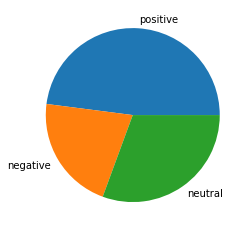

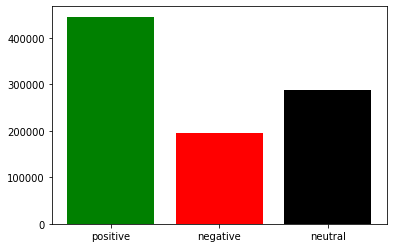

In [29]:
sentiment_plot(all_tweets)

## Save the already scored tweets and check if they were well saved 

In [30]:
all_tweets.to_csv('all_tweets_vaderSentiment.csv', index=False)

In [31]:
tweets = pd.read_csv('/content/all_tweets_vaderSentiment.csv')

In [32]:
tweets

,id,created_at,text,Comp_vader,Negative_vader,Neutral_vader,Positive_vader
0,14136,2020-04-09 00:00:01+00:00,S&amp;P 500 | $SPX | $SPX500 $USD S&amp;P TARG...,0.0000,0.179,0.643,0.179
1,14135,2020-04-09 00:00:03+00:00,"$HEXO target price is $2.21, HEXO has a upside...",0.0000,0.000,1.000,0.000
2,14134,2020-04-09 00:00:15+00:00,Why #realestate beats #stocks during a #recess...,-0.4215,0.237,0.763,0.000
3,14133,2020-04-09 00:00:15+00:00,RT : It's been confirmed that will arrive to ...,0.0000,0.000,1.000,0.000
4,14132,2020-04-09 00:00:26+00:00,This private #stocks #swingtrading will help ...,0.4376,0.211,0.494,0.295
...,...,...,...,...,...,...,...
928668,924309,2020-07-16 23:58:57+00:00,Quality company proving during hard times #JNJ...,-0.1027,0.135,0.865,0.000
928669,924308,2020-07-16 23:58:59+00:00,"RT : Small Account: NA Big Account: up $1,347 ...",-0.2003,0.110,0.809,0.081
928670,924307,2020-07-16 23:59:03+00:00,"If $AMZN dropped below $2,000 I would LOVE to ...",0.7841,0.000,0.844,0.156
928671,924306,2020-07-16 23:59:12+00:00,$MS $BAC,0.0000,0.000,1.000,0.000


In [33]:
del tweets

## See how many stock references there are and choose a stock to filter the tweets

In [34]:
ticker_pattern = re.compile(r'(^\$[A-Z]+|^\$ES_F|^\#[A-Z]+|^\#ES_F)')
ht_pattern = re.compile(r'#\w+')

ticker_dic = collections.defaultdict(int)
ht_dic = collections.defaultdict(int)

for text in all_tweets['text']:
    for word in text.split():
        if ticker_pattern.fullmatch(word) is not None:
            ticker_dic[word[1:]] += 1
        
        word = word.lower()
        if ht_pattern.fullmatch(word) is not None:
            ht_dic[word] += 1

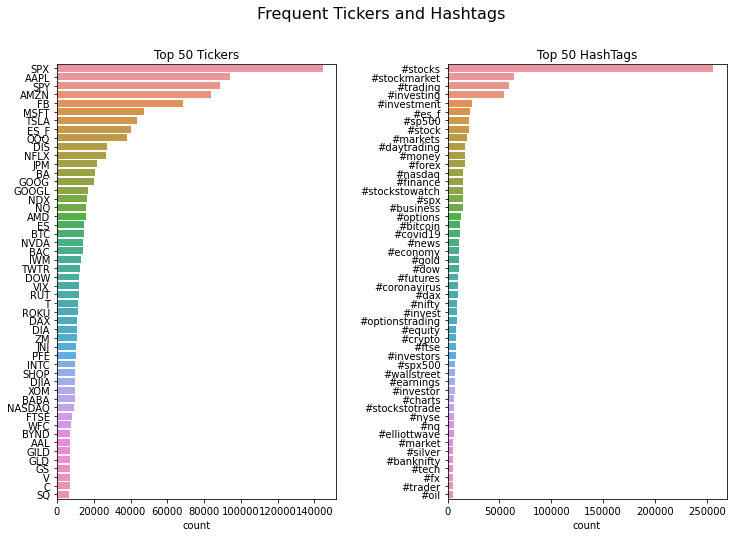

In [35]:
ticker_df = pd.DataFrame.from_dict(
    ticker_dic, orient='index').rename(columns={0:'count'})\
    .sort_values('count', ascending=False).head(50)
    
ht_df = pd.DataFrame.from_dict(
    ht_dic, orient='index').rename(columns={0:'count'})\
    .sort_values('count', ascending=False).head(50)

fig, ax = plt.subplots(1, 2, figsize=(12,8))
plt.suptitle('Frequent Tickers and Hashtags', fontsize=16)
plt.subplots_adjust(wspace=0.4)

sns.barplot(x=ticker_df['count'], y=ticker_df.index, orient='h', ax=ax[0])
ax[0].set_title('Top 50 Tickers')

sns.barplot(x=ht_df['count'], y=ht_df.index, orient='h', ax=ax[1])
ax[1].set_title('Top 50 HashTags')

plt.show()

In [36]:
def get_stock_tweets(ticker):
  
  stock = r"".join(i for i in f'((\#{ticker}).|(\${ticker}))')
  stock_tweets = {}
  stock_tweets["created_at"] = []
  stock_tweets["text"] = []
  stock_tweets["sentiment"] = []
  stock_tweets["Comp_vader"] = []
  stock_tweets["Negative_vader"] = []
  stock_tweets["Neutral_vader"] = []
  stock_tweets["Positive_vader"] = []

  for indexx, row in all_tweets.T.iteritems():
    #print(labelled_tweets.loc[indexx, "text"])
    result = re.search(stock, all_tweets.loc[indexx, "text"])
    if result != None:
      stock_tweets["created_at"].append(all_tweets.loc[indexx, "created_at"])
      stock_tweets["text"].append(all_tweets.loc[indexx, "text"])      
      stock_tweets["Comp_vader"].append(all_tweets.loc[indexx, "Comp_vader"])
      stock_tweets["Negative_vader"].append(all_tweets.loc[indexx, "Negative_vader"])
      stock_tweets["Neutral_vader"].append(all_tweets.loc[indexx, "Neutral_vader"])
      stock_tweets["Positive_vader"].append(all_tweets.loc[indexx, "Positive_vader"])

  stock_tweets = pd.DataFrame(stock_tweets, columns=["created_at", "text", "Comp_vader", "Negative_vader", "Neutral_vader", "Positive_vader"])
  return stock_tweets

In [37]:
ticker = "TSLA"
ticker_tweets = get_stock_tweets(ticker)
display(ticker_tweets)

,created_at,text,Comp_vader,Negative_vader,Neutral_vader,Positive_vader
0,2020-04-09 00:00:03+00:00,"$HEXO target price is $2.21, HEXO has a upside...",0.0000,0.000,1.000,0.000
1,2020-04-09 00:01:16+00:00,Today’s alerts $TSLA $OXY $MSFT $OUT $TWTR som...,-0.7184,0.129,0.828,0.042
2,2020-04-09 00:13:00+00:00,RT : Today’s alerts $TSLA $OXY $MSFT $OUT $TWT...,-0.4588,0.107,0.893,0.000
3,2020-04-09 00:17:39+00:00,$TSLA $OXY $MSFT $OUT $TAL $SDC $TWTR $XOM $BK...,0.7027,0.000,0.865,0.135
4,2020-04-09 00:20:44+00:00,You have the news: Disney+ Hits 50 Million Pai...,0.0000,0.000,1.000,0.000
...,...,...,...,...,...,...
45231,2020-07-16 23:50:00+00:00,$TWTR $ES $JD $BABA $BIDU $TME $SPY $QQQ $DIS ...,0.5106,0.000,0.924,0.076
45232,2020-07-16 23:50:27+00:00,RT : $TWTR $ES $JD $BABA $BIDU $TME $SPY $QQQ ...,0.0000,0.000,1.000,0.000
45233,2020-07-16 23:53:01+00:00,Loves $FEYE FireEye BREAKOUT Protects Against...,0.9141,0.000,0.662,0.338
45234,2020-07-16 23:54:46+00:00,"$NNDM added, green back to back days, bottom b...",0.9719,0.000,0.655,0.345


% of positive tweets=  51.05446989123706
% of negative tweets=  17.05500044212574
% of neutral tweets=  31.890529666637192


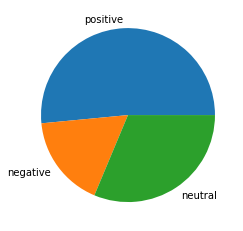

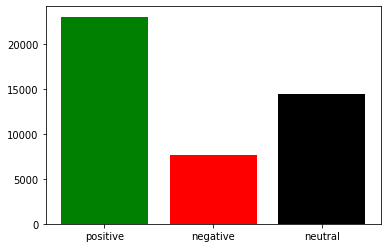

In [38]:
sentiment_plot(ticker_tweets)

In [39]:
ticker_tweets = ticker_tweets.sort_values(by=["created_at"])

In [40]:
ticker_tweets

,created_at,text,Comp_vader,Negative_vader,Neutral_vader,Positive_vader
0,2020-04-09 00:00:03+00:00,"$HEXO target price is $2.21, HEXO has a upside...",0.0000,0.000,1.000,0.000
1,2020-04-09 00:01:16+00:00,Today’s alerts $TSLA $OXY $MSFT $OUT $TWTR som...,-0.7184,0.129,0.828,0.042
2,2020-04-09 00:13:00+00:00,RT : Today’s alerts $TSLA $OXY $MSFT $OUT $TWT...,-0.4588,0.107,0.893,0.000
3,2020-04-09 00:17:39+00:00,$TSLA $OXY $MSFT $OUT $TAL $SDC $TWTR $XOM $BK...,0.7027,0.000,0.865,0.135
4,2020-04-09 00:20:44+00:00,You have the news: Disney+ Hits 50 Million Pai...,0.0000,0.000,1.000,0.000
...,...,...,...,...,...,...
45231,2020-07-16 23:50:00+00:00,$TWTR $ES $JD $BABA $BIDU $TME $SPY $QQQ $DIS ...,0.5106,0.000,0.924,0.076
45232,2020-07-16 23:50:27+00:00,RT : $TWTR $ES $JD $BABA $BIDU $TME $SPY $QQQ ...,0.0000,0.000,1.000,0.000
45233,2020-07-16 23:53:01+00:00,Loves $FEYE FireEye BREAKOUT Protects Against...,0.9141,0.000,0.662,0.338
45234,2020-07-16 23:54:46+00:00,"$NNDM added, green back to back days, bottom b...",0.9719,0.000,0.655,0.345


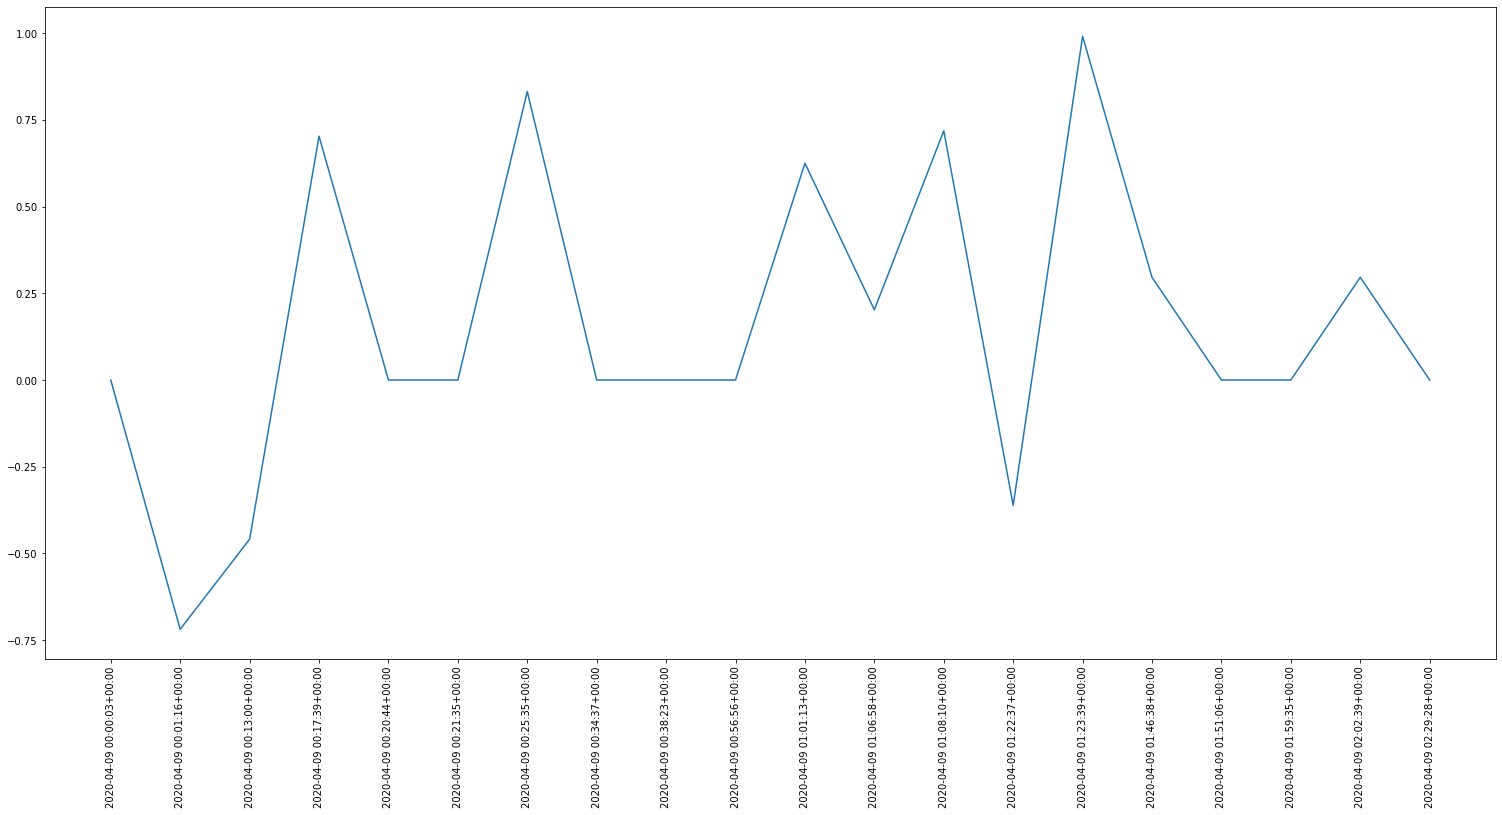

In [41]:
plt.figure(figsize=(26,12))
#stock_tweets.plot(x="created_at", y="Comp_vader", kind="line")
plt.plot(ticker_tweets["created_at"].values[:20], ticker_tweets["Comp_vader"].values[:20])
labels = ticker_tweets["created_at"].values[:20]
ax = plt.gca()
ax.set_xticklabels(labels=labels,rotation=90);
plt.show()

## Set index of sentiment data to the data of creation of the tweets and change the type to datetime

In [42]:
tesla_tweetsentiment_1d = pd.DataFrame(ticker_tweets["Comp_vader"].values, index=ticker_tweets["created_at"])

In [43]:
tesla_tweetsentiment_1d.columns = ["Vader_sentiment"]

In [44]:
tesla_tweetsentiment_1d.index = tesla_tweetsentiment_1d.index.astype('datetime64[ns]')

In [45]:
tesla_tweetsentiment_1d

,Vader_sentiment
created_at,
2020-04-09 00:00:03,0.0000
2020-04-09 00:01:16,-0.7184
2020-04-09 00:13:00,-0.4588
2020-04-09 00:17:39,0.7027
2020-04-09 00:20:44,0.0000
...,...
2020-07-16 23:50:00,0.5106
2020-07-16 23:50:27,0.0000
2020-07-16 23:53:01,0.9141


## Get stock data by 1 Day granularity

In [46]:
tsla = get_data("TSLA", start_date=(tesla_tweetsentiment_1d.index.min()).strftime('%Y-%m-%d'),
                end_date=tesla_tweetsentiment_1d.index.max().strftime('%Y-%m-%d'), index_as_date = True, interval="1d")

## Convert sentiment date to 1 Day granularity

In [47]:
tesla_tweetsentiment_1d = tesla_tweetsentiment_1d.resample("1D").mean()

In [48]:
tesla_tweetsentiment_1d

,Vader_sentiment
created_at,
2020-04-09,0.203668
2020-04-10,0.170581
2020-04-11,0.261416
2020-04-12,0.230259
2020-04-13,0.293164
...,...
2020-07-12,0.163414
2020-07-13,0.232788
2020-07-14,0.241265


In [49]:
tsla

,open,high,low,close,adjclose,volume,ticker
2020-04-09,112.417999,115.036003,111.421997,114.599998,114.599998,68250000,TSLA
2020-04-13,118.031998,130.399994,116.106003,130.190002,130.190002,112377000,TSLA
2020-04-14,139.794006,148.376007,138.485992,141.977997,141.977997,152882500,TSLA
2020-04-15,148.399994,150.626007,142.000000,145.966003,145.966003,117885000,TSLA
2020-04-16,143.388000,151.889999,141.343994,149.042007,149.042007,103289500,TSLA
...,...,...,...,...,...,...,...
2020-07-09,279.398010,281.712006,270.256012,278.855988,278.855988,58588000,TSLA
2020-07-10,279.200012,309.783997,275.201996,308.929993,308.929993,116688000,TSLA
2020-07-13,331.799988,358.997986,294.221985,299.411987,299.411987,194927000,TSLA
2020-07-14,311.200012,318.000000,286.200012,303.359985,303.359985,117090500,TSLA


## Join stock data with sentiment data

In [50]:
tsla_sentiment = tesla_tweetsentiment_1d.join(tsla, on=tesla_tweetsentiment_1d.index)

In [51]:
tsla_sentiment

,Vader_sentiment,open,high,low,close,adjclose,volume,ticker
created_at,,,,,,,,
2020-04-09,0.203668,112.417999,115.036003,111.421997,114.599998,114.599998,68250000.0,TSLA
2020-04-10,0.170581,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-11,0.261416,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-12,0.230259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-13,0.293164,118.031998,130.399994,116.106003,130.190002,130.190002,112377000.0,TSLA
...,...,...,...,...,...,...,...,...
2020-07-12,0.163414,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-13,0.232788,331.799988,358.997986,294.221985,299.411987,299.411987,194927000.0,TSLA
2020-07-14,0.241265,311.200012,318.000000,286.200012,303.359985,303.359985,117090500.0,TSLA


## Search for the best way to impute null values

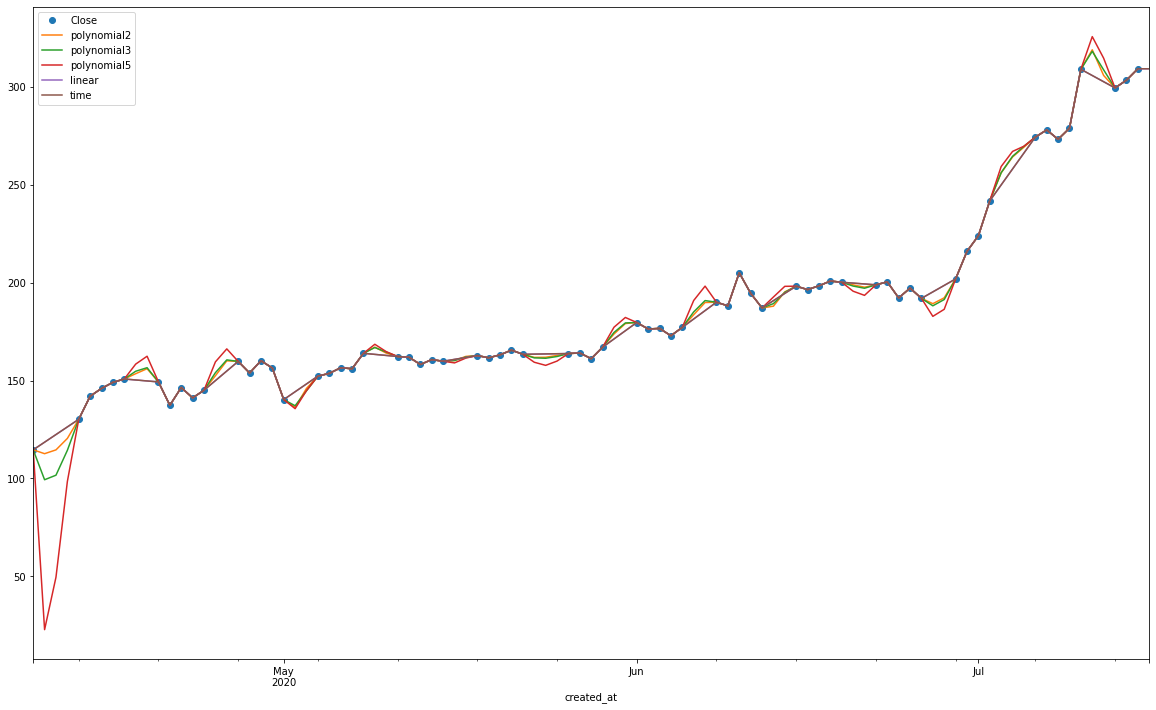

In [52]:
plt.figure(figsize=(20,12))
tsla_sentiment["close"].plot(label="Close", style=".", marker="o")
tsla_sentiment.interpolate(method='polynomial', order=2, limit_direction='forward', axis=0)["close"].plot(label="polynomial2")
tsla_sentiment.interpolate(method='polynomial', order=3, limit_direction='forward', axis=0)["close"].plot(label="polynomial3")
tsla_sentiment.interpolate(method='polynomial', order=5, limit_direction='forward', axis=0)["close"].plot(label="polynomial5")
tsla_sentiment.interpolate(method='linear', limit_direction='forward', axis=0)["close"].plot(label="linear")
tsla_sentiment.interpolate(method='time', axis=0)["close"].plot(label="time")
plt.legend()
plt.show()

In [53]:
tsla_sentiment["volume"].fillna(tsla_sentiment["volume"].rolling(4,min_periods=1).mean(), inplace=True)

In [54]:
tsla_sentiment["volume"]

created_at
2020-04-09     68250000.0
2020-04-10     68250000.0
2020-04-11     68250000.0
2020-04-12     68250000.0
2020-04-13    112377000.0
                 ...     
2020-07-12     87638000.0
2020-07-13    194927000.0
2020-07-14    117090500.0
2020-07-15     81839000.0
2020-07-16    131285500.0
Freq: D, Name: volume, Length: 99, dtype: float64

In [55]:
tsla_sentiment = tsla_sentiment.interpolate(method='polynomial', order=3, limit_direction='forward', axis=0)

In [56]:
tsla_sentiment

,Vader_sentiment,open,high,low,close,adjclose,volume,ticker
created_at,,,,,,,,
2020-04-09,0.203668,112.417999,115.036003,111.421997,114.599998,114.599998,68250000.0,TSLA
2020-04-10,0.170581,80.814718,82.383144,66.194967,99.321558,99.321558,68250000.0,NaN
2020-04-11,0.261416,78.146515,83.397138,63.124171,101.640960,101.640960,68250000.0,NaN
2020-04-12,0.230259,94.017555,104.071563,85.373289,114.337382,114.337382,68250000.0,NaN
2020-04-13,0.293164,118.031998,130.399994,116.106003,130.190002,130.190002,112377000.0,TSLA
...,...,...,...,...,...,...,...,...
2020-07-12,0.163414,324.283720,367.893460,292.693895,308.631641,308.631641,87638000.0,NaN
2020-07-13,0.232788,331.799988,358.997986,294.221985,299.411987,299.411987,194927000.0,TSLA
2020-07-14,0.241265,311.200012,318.000000,286.200012,303.359985,303.359985,117090500.0,TSLA


In [57]:
tsla_sentiment.fillna(tsla_sentiment.rolling(4,min_periods=1).mean(), inplace=True)

In [58]:
tsla_sentiment

,Vader_sentiment,open,high,low,close,adjclose,volume,ticker
created_at,,,,,,,,
2020-04-09,0.203668,112.417999,115.036003,111.421997,114.599998,114.599998,68250000.0,TSLA
2020-04-10,0.170581,80.814718,82.383144,66.194967,99.321558,99.321558,68250000.0,NaN
2020-04-11,0.261416,78.146515,83.397138,63.124171,101.640960,101.640960,68250000.0,NaN
2020-04-12,0.230259,94.017555,104.071563,85.373289,114.337382,114.337382,68250000.0,NaN
2020-04-13,0.293164,118.031998,130.399994,116.106003,130.190002,130.190002,112377000.0,TSLA
...,...,...,...,...,...,...,...,...
2020-07-12,0.163414,324.283720,367.893460,292.693895,308.631641,308.631641,87638000.0,NaN
2020-07-13,0.232788,331.799988,358.997986,294.221985,299.411987,299.411987,194927000.0,TSLA
2020-07-14,0.241265,311.200012,318.000000,286.200012,303.359985,303.359985,117090500.0,TSLA


## Scaling stock data

In [59]:
"""
smoothing_window_size = 2

scaler_power = PowerTransformer()

scaler = scaler_power


for di in range(0,tsla_sentiment["Vader_sentiment"].values.shape[0]+1,smoothing_window_size):
    scaler.fit(tsla_sentiment["Vader_sentiment"].values[di:di+smoothing_window_size].reshape(1, -1))
    tsla_sentiment["close"].values[di:di+smoothing_window_size] = scaler.inverse_transform(tsla_sentiment["close"].values[di:di+smoothing_window_size].reshape(1, -1))

"""

'\nsmoothing_window_size = 2\n\nscaler_power = PowerTransformer()\n\nscaler = scaler_power\n\n\nfor di in range(0,tsla_sentiment["Vader_sentiment"].values.shape[0]+1,smoothing_window_size):\n    scaler.fit(tsla_sentiment["Vader_sentiment"].values[di:di+smoothing_window_size].reshape(1, -1))\n    tsla_sentiment["close"].values[di:di+smoothing_window_size] = scaler.inverse_transform(tsla_sentiment["close"].values[di:di+smoothing_window_size].reshape(1, -1))\n\n'

In [60]:
scaler2 = MinMaxScaler(feature_range=(0, 1))
tsla_sentiment[["close"]] = scaler2.fit_transform(tsla_sentiment[["close"]])

In [61]:
scaler= MinMaxScaler(feature_range=(0, 1))
tsla_sentiment[['open', 'high', 'low', 'adjclose', 'volume']] = scaler.fit_transform(tsla_sentiment[['open', 'high', 'low', 'adjclose', 'volume']])

In [62]:
tsla_sentiment

,Vader_sentiment,open,high,low,close,adjclose,volume,ticker
created_at,,,,,,,,
2020-04-09,0.203668,0.135111,0.114367,0.208993,0.069829,0.069829,0.223388,TSLA
2020-04-10,0.170581,0.010519,0.000000,0.013288,0.000000,0.000000,0.223388,NaN
2020-04-11,0.261416,0.000000,0.003552,0.000000,0.010601,0.010601,0.223388,NaN
2020-04-12,0.230259,0.062570,0.075964,0.096276,0.068629,0.068629,0.223388,NaN
2020-04-13,0.293164,0.157244,0.168179,0.229262,0.141082,0.141082,0.493915,TSLA
...,...,...,...,...,...,...,...,...
2020-07-12,0.163414,0.970368,1.000000,0.993388,0.956639,0.956639,0.342249,NaN
2020-07-13,0.232788,1.000000,0.968844,1.000000,0.914501,0.914501,1.000000,TSLA
2020-07-14,0.241265,0.918787,0.825248,0.965288,0.932546,0.932546,0.522812,TSLA


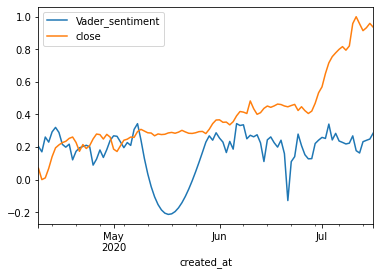

In [63]:
tsla_sentiment[["Vader_sentiment", "close"]].plot()
plt.show()

# Time Series

## Help functions

In [104]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
  '''
  Convert series to supervised learning
  '''
  
  n_vars = 1 if type(data) is list else data.shape[1]
  df = pd.DataFrame(data)
  cols, names = list(), list()
  for i in range(n_in, 0, -1):
    cols.append(df.shift(i))
    names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
  for i in range(0, n_out):
    cols.append(df.shift(-i))
    if i == 0:
      names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
    else:
      names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
  agg = pd.concat(cols, axis=1)
  agg.columns = names
  if dropnan:
    agg.dropna(inplace=True)
  return agg

def profitability_test(real_test, predicted_test):
  Number_of_Shares = 100
  Share_Purchase_Price = real_test[0]
  Commissions = 5
  Share_Sell_Price = real_test[-1]
  Dividends_Received = 35
  Costs = (Number_of_Shares * Share_Purchase_Price) + Commissions
  Proceeds = (Number_of_Shares * Share_Sell_Price) + Dividends_Received - Commissions
  Profits = Proceeds - Costs
  Cumulative_Return = (Profits/Costs) * 100
  print(f"Real cumulative return : {Cumulative_Return}%")

  Number_of_Shares = 100
  Share_Purchase_Price = predicted_test[0]
  Commissions = 5
  Share_Sell_Price = predicted_test[-1]
  Dividends_Received = 35
  Costs = (Number_of_Shares * Share_Purchase_Price) + Commissions
  Proceeds = (Number_of_Shares * Share_Sell_Price) + Dividends_Received - Commissions
  Profits = Proceeds - Costs
  Cumulative_Return = (Profits/Costs) * 100
  print(f"Cumulative return from model: {Cumulative_Return}%")

def loss_plot(model_history):
  plt.plot(model_history.history['loss'], label='train')
  plt.plot(model_history.history['val_loss'], label='test')
  plt.title("Loss function plot")
  plt.legend()
  plt.xlabel("epochs")
  plt.ylabel("mean squared error")
  plt.show()

def prediction_plot(xt_dropped):
  yp = model.predict(xt_dropped)

  print(f"Test R^2: {r2_score(yt,yp)}")
  print(f"Test MAE: {mean_absolute_error(yt,yp)}")
  print(f"Test MSE: {mean_squared_error(yt,yp)}")
  print(f"Test RMSE: {np.sqrt(mean_squared_error(yt,yp))}")
  
  print()
  model.save(f"tesla_stockPrediction_sentimentAnalysis_{r2_score(yt,yp)}.h5")
  yt_tansform = scaler2.inverse_transform(yt.values.reshape(-1, 1))
  yp_tansform  = scaler2.inverse_transform(yp.reshape(-1, 1))
  print(f"Test RMSE scaled: {np.sqrt(mean_squared_error(yt_tansform,yp_tansform))}")
  print(f"Test MPE: {np.sum((yt_tansform-yp_tansform)/yt_tansform)*100}")

  df_pred = pd.DataFrame({"test":yt_tansform.reshape(-1),
                          "pred":yp_tansform.reshape(-1)})
  y_limits = [i for i in range(int(yt_tansform.min()),int(yt_tansform.max())+10,20)]
  x_limits = test.index.values
  df_pred.plot()
  plt.title("Prediction plot")
  plt.legend(["test", "pred"])
  plt.xlabel("days")
  plt.ylabel("close price")
  plt.ylim(bottom=0)
  plt.show()
  print()
  return yt_tansform, yp_tansform

def build_model(xr_2):
  model = Sequential()
  model.add(LSTM(50, return_sequences=True, input_shape=(xr_2.shape[1], 1)))
  model.add(Bidirectional(LSTM(15, return_sequences=True)))
  model.add(Conv1D(filters=30, kernel_size=2))

  model.add(LSTM(15))

  model.add(Dropout(0.2))

  model.add(Flatten())

  model.add(Dense(256))

  model.add(Dense(1, activation = "linear"))

  return model

## Set random seed for reproducibility 

In [65]:
seed = 2022  #93,14%
#seed = 42   #92,41%

In [66]:
def set_seed(s):

  np.random.seed(s)
  tf.random.set_seed(s)
  tf.keras.utils.set_random_seed(s)

set_seed(seed)

## Split data into training data and test data

In [67]:
train = tsla_sentiment[:75]
test = tsla_sentiment[75:]

In [68]:
train = train.drop(["ticker"], axis=1)
test = test.drop(["ticker"], axis=1)

In [69]:
train

,Vader_sentiment,open,high,low,close,adjclose,volume
created_at,,,,,,,
2020-04-09,0.203668,0.135111,0.114367,0.208993,0.069829,0.069829,0.223388
2020-04-10,0.170581,0.010519,0.000000,0.013288,0.000000,0.000000,0.223388
2020-04-11,0.261416,0.000000,0.003552,0.000000,0.010601,0.010601,0.223388
2020-04-12,0.230259,0.062570,0.075964,0.096276,0.068629,0.068629,0.223388
2020-04-13,0.293164,0.157244,0.168179,0.229262,0.141082,0.141082,0.493915
...,...,...,...,...,...,...,...
2020-06-18,0.199648,0.482759,0.425403,0.587499,0.463765,0.463765,0.103899
2020-06-19,0.241900,0.490470,0.423140,0.584791,0.460968,0.460968,0.071033
2020-06-20,0.159368,0.489092,0.418399,0.579175,0.452051,0.452051,0.094363


In [70]:
test

,Vader_sentiment,open,high,low,close,adjclose,volume
created_at,,,,,,,
2020-06-23,0.140977,0.479510,0.420359,0.587101,0.461772,0.461772,0.000089
2020-06-24,0.279466,0.475749,0.412570,0.551731,0.424358,0.424358,0.140919
2020-06-25,0.208785,0.444336,0.402132,0.537893,0.447329,0.447329,0.088652
2020-06-26,0.152707,0.476278,0.408451,0.553228,0.423344,0.423344,0.076403
2020-06-27,0.127557,0.482830,0.402152,0.549487,0.405976,0.405976,0.101991
2020-06-28,0.128836,0.463338,0.396300,0.537811,0.420620,0.420620,0.082528
2020-06-29,0.221639,0.455959,0.418958,0.547733,0.468692,0.468692,0.081660
2020-06-30,0.242271,0.485519,0.473380,0.595513,0.533098,0.533098,0.323578
2020-07-01,0.259233,0.545837,0.506752,0.661953,0.569497,0.569497,0.213484


## Shift the data by 1 day for the prediction of 1 day into the future

In [71]:
n_out = 1
reframed = series_to_supervised(train.values, 1, n_out)

In [72]:
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t)
1,0.203668,0.135111,0.114367,0.208993,0.069829,0.069829,0.223388,0.170581,0.010519,0.000000,0.013288,0.000000,0.000000,0.223388
2,0.170581,0.010519,0.000000,0.013288,0.000000,0.000000,0.223388,0.261416,0.000000,0.003552,0.000000,0.010601,0.010601,0.223388
3,0.261416,0.000000,0.003552,0.000000,0.010601,0.010601,0.223388,0.230259,0.062570,0.075964,0.096276,0.068629,0.068629,0.223388
4,0.230259,0.062570,0.075964,0.096276,0.068629,0.068629,0.223388,0.293164,0.157244,0.168179,0.229262,0.141082,0.141082,0.493915
5,0.293164,0.157244,0.168179,0.229262,0.141082,0.141082,0.493915,0.320628,0.243038,0.231140,0.326104,0.194959,0.194959,0.742240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0.226486,0.470703,0.415456,0.577201,0.452640,0.452640,0.108157,0.199648,0.482759,0.425403,0.587499,0.463765,0.463765,0.103899
71,0.199648,0.482759,0.425403,0.587499,0.463765,0.463765,0.103899,0.241900,0.490470,0.423140,0.584791,0.460968,0.460968,0.071033
72,0.241900,0.490470,0.423140,0.584791,0.460968,0.460968,0.071033,0.159368,0.489092,0.418399,0.579175,0.452051,0.452051,0.094363
73,0.159368,0.489092,0.418399,0.579175,0.452051,0.452051,0.094363,-0.128564,0.484915,0.416648,0.577495,0.446996,0.446996,0.087466


In [73]:
reframed.drop(["var1(t)",	"var2(t)",	"var3(t)",	"var4(t)", "var6(t)",	"var7(t)"], axis=1, inplace=True)

In [74]:
x_reframed_train = reframed.drop(["var5(t)"], axis=1)
y_reframed_train = reframed["var5(t)"]
print(x_reframed_train)
print(y_reframed_train)

    var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1    0.203668   0.135111   0.114367   0.208993   0.069829   0.069829   
2    0.170581   0.010519   0.000000   0.013288   0.000000   0.000000   
3    0.261416   0.000000   0.003552   0.000000   0.010601   0.010601   
4    0.230259   0.062570   0.075964   0.096276   0.068629   0.068629   
5    0.293164   0.157244   0.168179   0.229262   0.141082   0.141082   
..        ...        ...        ...        ...        ...        ...   
70   0.226486   0.470703   0.415456   0.577201   0.452640   0.452640   
71   0.199648   0.482759   0.425403   0.587499   0.463765   0.463765   
72   0.241900   0.490470   0.423140   0.584791   0.460968   0.460968   
73   0.159368   0.489092   0.418399   0.579175   0.452051   0.452051   
74  -0.128564   0.484915   0.416648   0.577495   0.446996   0.446996   

    var7(t-1)  
1    0.223388  
2    0.223388  
3    0.223388  
4    0.223388  
5    0.493915  
..        ...  
70   0.108157  
71   0.

In [75]:
n_out = 1
reframed_test = series_to_supervised(test.values, 1, n_out)
reframed_test.drop(["var1(t)",	"var2(t)",	"var3(t)",	"var4(t)", "var6(t)",	"var7(t)"], axis=1, inplace=True)

In [76]:
x_reframed_test = reframed_test.drop(["var5(t)"], axis=1)
y_reframed_test = reframed_test["var5(t)"]
print(x_reframed_test)
print(y_reframed_test)

    var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1    0.140977   0.479510   0.420359   0.587101   0.461772   0.461772   
2    0.279466   0.475749   0.412570   0.551731   0.424358   0.424358   
3    0.208785   0.444336   0.402132   0.537893   0.447329   0.447329   
4    0.152707   0.476278   0.408451   0.553228   0.423344   0.423344   
5    0.127557   0.482830   0.402152   0.549487   0.405976   0.405976   
6    0.128836   0.463338   0.396300   0.537811   0.420620   0.420620   
7    0.221639   0.455959   0.418958   0.547733   0.468692   0.468692   
8    0.242271   0.485519   0.473380   0.595513   0.533098   0.533098   
9    0.259233   0.545837   0.506752   0.661953   0.569497   0.569497   
10   0.252794   0.655025   0.571667   0.752910   0.650878   0.650878   
11   0.340870   0.693194   0.616417   0.792862   0.716707   0.716707   
12   0.243659   0.673567   0.636704   0.791647   0.754898   0.754898   
13   0.283906   0.655552   0.650704   0.788468   0.778311   0.77

## Build and Train the model, make Predictions, test Profitability

In [105]:
xr,xt,yr,yt = x_reframed_train, x_reframed_test, y_reframed_train, y_reframed_test

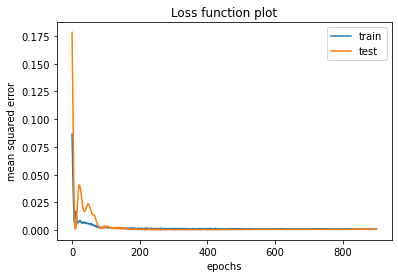

Test R^2: 0.9007686315463964
Test MAE: 0.052287339297617356
Test MSE: 0.00421488319833743
Test RMSE: 0.06492213180678397

Test RMSE scaled: 14.204784195895881
Test MPE: -6.169188160728005


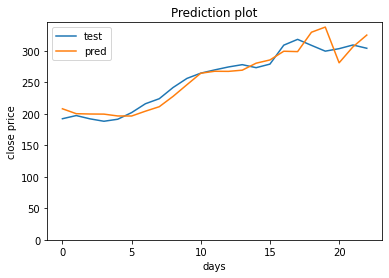


Real cumulative return : [58.30367586]%
Cumulative return from model: [56.352043]%


In [106]:
set_seed(seed)
model = build_model(xr)

model.compile(loss='mse', optimizer='adam', metrics=["mae","MAPE"])

history = model.fit(xr, yr, epochs=900, batch_size=256, validation_split=0.1, verbose=0, shuffle=False)
loss_plot(history)

yt,yp = prediction_plot(xt)

profitability_test(yt, yp)


### Dropping Sentiment column

In [107]:
xr,xt,yr,yt = x_reframed_train, x_reframed_test, y_reframed_train, y_reframed_test
set_seed(seed)

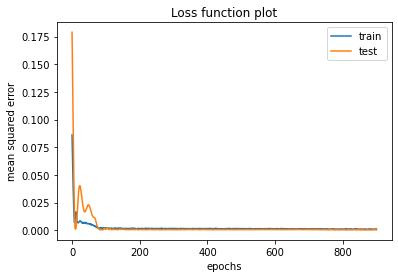

Test R^2: 0.8147628481203604
Test MAE: 0.057364784622920516
Test MSE: 0.007868005564494645
Test RMSE: 0.08870177881246037

Test RMSE scaled: 19.407702608451743
Test MPE: -1.1874027112612664


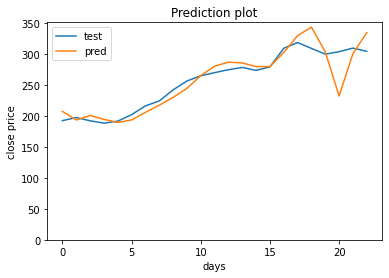


Real cumulative return : [58.30367586]%
Cumulative return from model: [61.38948]%


In [108]:

xr2 = xr.drop(["var1(t-1)"], axis=1)


model = build_model(xr2)

model.compile(loss='mse', optimizer='adam', metrics=["mae","MAPE"])

history = model.fit(xr2, yr, epochs=900, batch_size=256, validation_split=0.1, verbose=0, shuffle=False)
loss_plot(history)

yt,yp = prediction_plot(xt.drop(["var1(t-1)"], axis=1))

profitability_test(yt, yp)


### Dropping Volume column

In [109]:
xr,xt,yr,yt = x_reframed_train, x_reframed_test, y_reframed_train, y_reframed_test
set_seed(seed)

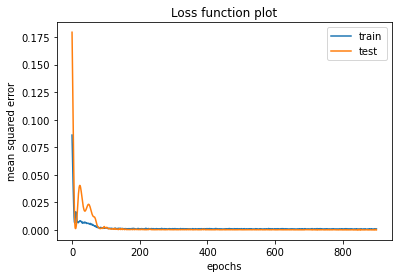

Test R^2: 0.9485506373786663
Test MAE: 0.0362989599603607
Test MSE: 0.0021853276585540667
Test RMSE: 0.046747488259307225

Test RMSE scaled: 10.228219614399258
Test MPE: 1.0626574657076684


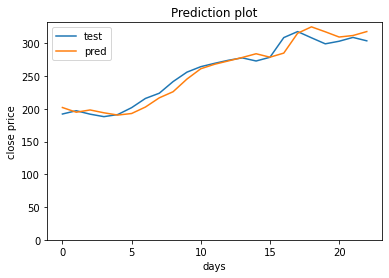


Real cumulative return : [58.30367586]%
Cumulative return from model: [57.520382]%


In [110]:
xr2 = xr.drop(["var7(t-1)"], axis=1)

model = build_model(xr2)

model.compile(loss='mse', optimizer='adam', metrics=["mae","MAPE"])

history = model.fit(xr2, yr, epochs=900, batch_size=256, validation_split=0.1, verbose=0, shuffle=False)
loss_plot(history)

yt,yp = prediction_plot(xt.drop(["var7(t-1)"], axis=1))

profitability_test(yt, yp)


### Dropping Sentiment and Volume columns

In [111]:
xr,xt,yr,yt = x_reframed_train, x_reframed_test, y_reframed_train, y_reframed_test
set_seed(seed)

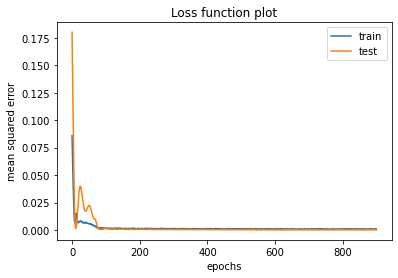

Test R^2: 0.951467337684616
Test MAE: 0.036143063100275485
Test MSE: 0.002061439907072727
Test RMSE: 0.04540308257236205

Test RMSE scaled: 9.93407190724599
Test MPE: 35.203400522115736


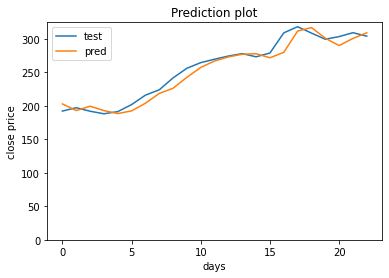


Real cumulative return : [58.30367586]%
Cumulative return from model: [52.454823]%


In [112]:
xr2 = xr.drop(["var1(t-1)","var7(t-1)"], axis=1)

model = build_model(xr2)

model.compile(loss='mse', optimizer='adam', metrics=["mae","MAPE"])

history = model.fit(xr2, yr, epochs=900, batch_size=256, validation_split=0.1, verbose=0, shuffle=False)
loss_plot(history)

yt,yp = prediction_plot(xt.drop(["var1(t-1)","var7(t-1)"], axis=1))

profitability_test(yt, yp)




# Final considerations to improve the model



- gather more data
- try to get 1 hour granularity on the stock data
- try other imputation techniques for null/missing values
- try other deep/machine learning models
- try custom sentiment analysis
- try other scaling techniques
- check for correlation with other stocks at different time windows
- finetuning the model(s)

# References

- https://www.investopedia.com/terms/s/stockdividend.asp#:~:text=Key%20Takeaways%201%20A%20stock%20dividend%20is%20a,do%20not%20affect%20the%20value%20of%20the%20company.			23/05/2022

- https://www.abstractops.com/how-to-calculate-stock-profit		23/05/2022
- https://github.com/AshwiniDPrabhu/Stock-Prediction-Using-Twitter-Sentiment-Analysis           18/05/2022

- https://www.kaggle.com/datasets/utkarshxy/stock-markettweets-lexicon-data	16/05/2022

- https://ieee-dataport.org/open-access/stock-market-tweets-data 16/05/2022